<a href="https://colab.research.google.com/github/tim-z-tang/school_work/blob/main/Tang_Timothy_ORF_350_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Timothy Tang

ORF 350 Final

# Problem 5

In [ ]:
# import packages
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error
!pip install statsmodels
from statsmodels.tools import eval_measures as em
from sklearn.preprocessing import scale

import scipy as cp
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import export_graphviz

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

import random

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import scale

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from sklearn import svm

In [ ]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() 
from sklearn import datasets
from tensorflow.python.framework import ops

Instructions for updating:
non-resource variables are not supported in the long term


In [ ]:
import os

os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [ ]:
from tensorflow.keras import layers

In [ ]:
from sklearn import linear_model
from sklearn import datasets
from sklearn.svm import l1_min_c

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve

In [ ]:
# upload file from GDrive
!pip install PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
downloaded = drive.CreateFile({'id':"1H2Pki2F1CcTHV00ef5HhHqz5h4Tqhsoo"})
downloaded.GetContentFile('credicard.xlsx')

In [ ]:
credit_df = pd.read_excel('credicard.xlsx')
print(credit_df.shape)

(284807, 31)


## a

In [ ]:
isFraud = credit_df.loc[:,'Class']

fraud_df = credit_df.loc[isFraud==1,:]
nofr_df = credit_df.loc[isFraud==0,:]
print(fraud_df.shape)


(492, 31)


In [ ]:
credit = np.asarray(credit_df)

numFraud = int(sum(isFraud))
numNoFr = len(isFraud)-numFraud

print(numFraud)
print(numNoFr)


492
284315


In [ ]:
from sklearn.model_selection import train_test_split

train_fraud, test_fraud = train_test_split(fraud_df,test_size=0.5)
train_nofr, test_nofr = train_test_split(nofr_df,test_size=0.5)

print(train_fraud.shape)
print(test_nofr.shape)

(246, 31)
(142158, 31)


In [ ]:
trainDat = np.row_stack((train_fraud,train_nofr))
testDat = np.row_stack((test_fraud,test_nofr))

trainX = trainDat[:,:-1]
trainY = trainDat[:,-1]

testX = testDat[:,:-1]
testY = testDat[:,-1]

print(trainX.shape)
print(trainY.shape)

(142403, 30)
(142403,)


## b

### logit

In [ ]:
## LASSO with logit
params = l1_min_c(scale(trainX), trainY, loss='log') * np.linspace(1e-12, 10, 50)

clf = linear_model.LogisticRegression(penalty='l1', solver='liblinear')

coefs = []
objVals = np.zeros(len(params))

for c_ind,c in enumerate(params):
  clf.set_params(C=c)
  clf.fit(scale(trainX), trainY)
  coefs.append(clf.coef_.ravel().copy())
  
  probVals = clf.predict_proba(scale(trainX))[:,0]
  objVal = np.multiply(trainY, np.log(1-probVals)) + np.multiply(1-trainY, np.log(probVals))
  objVal = -np.sum(objVal) + c*np.sum(np.abs(clf.coef_))
  objVals[c_ind] = objVal

In [ ]:
bestParam = params[np.min(np.where(objVals == np.min(objVals)))]

clf.set_params(C=bestParam)
clf.fit(scale(testX), testY)

print(' optimal param:         ', bestParam)
print(' coefficient estimates: ', clf.coef_, clf.intercept_)
print(' nonzero coefficients:  ', np.count_nonzero(clf.coef_)+np.count_nonzero(clf.intercept_))
print(' fit score:             ', clf.score(scale(testX), testY))

 optimal param:          0.00014093340192092226
 coefficient estimates:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]] [-2.9121865]
 nonzero coefficients:   1
 fit score:              0.9982725204348193


In [ ]:
clf2 = LogisticRegression()

clf2.fit(scale(trainX), trainY)

print(' coefficient estimates: ', clf2.coef_, clf2.intercept_)
print(' nonzero coefficients:  ', np.count_nonzero(clf2.coef_)+np.count_nonzero(clf2.intercept_))
print(' fit score:             ', clf2.score(scale(testX), testY))

 coefficient estimates:  [[-0.40621743  0.11345155  0.34065342  0.00498171  1.23753999  0.39330996
  -0.19255554 -0.08635658 -0.22403424  0.05321057 -0.97548353  0.10247371
   0.13324072 -0.51442693 -0.51825604  0.03362509  0.09979354 -0.16204668
  -0.12224046  0.24064625 -0.19992181  0.38244368  0.74243618  0.01927922
   0.13237249 -0.07844163  0.17498616 -0.236538   -0.03112255  0.3842995 ]] [-9.17801498]
 nonzero coefficients:   31
 fit score:              0.9992064829639616


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


We choose the penalty parameter using k-fold cross validation for $l_1$ regularization. The coefficient estimates are, as expected, far more sparse for logit with LASSO.

### SVM

In [ ]:
clf3 = svm.SVC(kernel='rbf', max_iter = 100)
alphas = np.linspace(1e-12,1,10)
parameters={'C':alphas}
cv = GridSearchCV(clf3, parameters, cv=5)
cv.fit(scale(trainX), trainY)

bestC3 = cv.best_params_['C']

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base

In [ ]:
clf3 = svm.SVC(kernel='rbf', max_iter = 100,C=bestC3)
clf3.fit(scale(trainX),trainY)

print(' optimal param:         ', bestC3)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


 optimal param:          1.0
 fit score:              0.9995014184994804


In [ ]:
clf4 = svm.SVC(kernel='poly', max_iter = 100)
alphas = np.linspace(1e-12,1,10)
parameters={'C':alphas}
cv = GridSearchCV(clf4, parameters, cv=5)
cv.fit(scale(trainX), trainY)

bestC4 = cv.best_params_['C']

clf4 = svm.SVC(kernel='rbf', max_iter = 100,C=bestC4)
clf4.fit(scale(trainX),trainY)

print(' optimal param:         ', bestC4)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base

 optimal param:          0.111111111112
 fit score:              0.9995154630487908


In [ ]:
clf5 = svm.LinearSVC('l2', 'hinge', max_iter = 100)
alphas = np.linspace(1e-12,1,10)
parameters={'C':alphas}
cv = GridSearchCV(clf5, parameters, cv=5)
cv.fit(scale(trainX), trainY)

bestC5 = cv.best_params_['C']

clf5 = svm.SVC(kernel='rbf', max_iter = 100,C=bestC5)
clf5.fit(scale(trainX),trainY)

print(' optimal param:         ', bestC5)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

 optimal param:          0.555555555556
 fit score:              0.9995014184994804


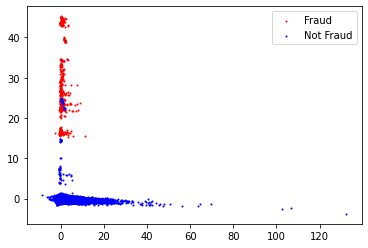

In [ ]:
from sklearn.decomposition import PCA

pcaModel = PCA(n_components=2,svd_solver='full')
pca = pcaModel.fit_transform(scale(credit_df))

plt.scatter(pca[:,0][isFraud==1],
            pca[:,1][isFraud==1],
            color='red', s=1,
            label='Fraud')
plt.scatter(pca[:,0][isFraud==0],
            pca[:,1][isFraud==0],
            color='blue', s=1,
            label='Not Fraud')

plt.legend()
plt.show()

Based on a PCA plot of the first two dimensions, it seems that the data is fairly separable. We experiment with radial basis, polynomial, and linear kernels and select the best penalty parameter for each type of kernel. Our optimal hyperparameter is shown for each. In particular, a RBF kernel with hyperparameter 1 seems to perform well, as we see that fraud / not fraud is well distinguished by distance from the origin.



### shallow NN

In [ ]:
trainX_nn = scale(trainX)
trainX_nn = trainX_nn[...,tf.newaxis,tf.newaxis]

testX_nn = scale(testX)
testX_nn = testX_nn[...,tf.newaxis,tf.newaxis]

print(trainX_nn.shape)

(142403, 30, 1, 1)


In [ ]:
modelS = tf.keras.models.Sequential([
    layers.Flatten(input_shape=(30,1,1)),
    layers.Dense(15, activation='sigmoid'),
    layers.Dense(1, activation='sigmoid')
    ])
modelS.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 30)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 15)                465       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 16        
Total params: 481
Trainable params: 481
Non-trainable params: 0
_________________________________________________________________


In [ ]:
loss_fn = tf.keras.losses.BinaryCrossentropy(from_logits=True)

modelS.compile(optimizer='sgd',
              loss=loss_fn,
              metrics=['accuracy'])

In [ ]:
modelS.fit(trainX_nn, trainY, epochs=10, batch_size=32)

Train on 142403 samples
Epoch 1/10
142403/142403 [==============================] - 4s 29us/sample - loss: 0.7164 - acc: 0.9969
Epoch 2/10
142403/142403 [==============================] - 4s 29us/sample - loss: 0.6965 - acc: 0.9983
Epoch 3/10
142403/142403 [==============================] - 4s 29us/sample - loss: 0.6950 - acc: 0.9983
Epoch 4/10
142403/142403 [==============================] - 4s 29us/sample - loss: 0.6945 - acc: 0.9983
Epoch 5/10
142403/142403 [==============================] - 4s 29us/sample - loss: 0.6942 - acc: 0.9983
Epoch 6/10
142403/142403 [==============================] - 4s 29us/sample - loss: 0.6940 - acc: 0.9983
Epoch 7/10
142403/142403 [==============================] - 4s 29us/sample - loss: 0.6938 - acc: 0.9983
Epoch 8/10
142403/142403 [==============================] - 4s 30us/sample - loss: 0.6937 - acc: 0.9983
Epoch 9/10
142403/142403 [==============================] - 4s 30us/sample - loss: 0.6937 - acc: 0.9983
Epoch 10/10
142403/142403 [=============

For the shallow NN we experimented with varying numbers of nodes in the hidden layer, ranging from 5 to 40; and different activation functions such as sigmoid, relu, and selu. We ultimately find a 15-node network with sigmoid activation yields the best accuracy when training, and we use Binarycrossentropy loss as it is binary classification.

### deep NN

In [ ]:
model = tf.keras.models.Sequential([
    layers.Conv2D(6,  kernel_size=(5, 5), strides=(1, 1), activation='relu', 
                  input_shape=(30,1,1), padding="same"),
    layers.MaxPooling2D(pool_size=(2, 1), strides=(2, 1), padding='valid'),
    layers.Flatten(),
    layers.Dropout(rate=0.2),
    layers.Dense(120, activation='relu'),
    layers.Dense(1, activation='relu')
    ])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 1, 6)          156       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 1, 6)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 90)                0         
_________________________________________________________________
dropout (Dropout)            (None, 90)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 120)               10920     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 121       
Total params: 11,197
Trainable params: 11,197
Non-trainable params: 0
__________________________________________________

In [ ]:
loss_fn = tf.keras.losses.BinaryCrossentropy(from_logits=True)

model.compile(optimizer='sgd',
              loss=loss_fn,
              metrics=['accuracy'])

In [ ]:
model.fit(trainX_nn, trainY, epochs=10, batch_size=32)

Train on 142403 samples
Epoch 1/10
142403/142403 [==============================] - 9s 64us/sample - loss: 0.6932 - acc: 0.9983
Epoch 2/10
142403/142403 [==============================] - 9s 61us/sample - loss: 0.6931 - acc: 0.9983
Epoch 3/10
142403/142403 [==============================] - 9s 61us/sample - loss: 0.6930 - acc: 0.9987
Epoch 4/10
142403/142403 [==============================] - 9s 61us/sample - loss: 0.6929 - acc: 0.9989
Epoch 5/10
142403/142403 [==============================] - 9s 61us/sample - loss: 0.6929 - acc: 0.9991
Epoch 6/10
142403/142403 [==============================] - 9s 61us/sample - loss: 0.6929 - acc: 0.9991
Epoch 7/10
142403/142403 [==============================] - 9s 61us/sample - loss: 0.6928 - acc: 0.9992
Epoch 8/10
142403/142403 [==============================] - 9s 61us/sample - loss: 0.6928 - acc: 0.9992
Epoch 9/10
142403/142403 [==============================] - 9s 61us/sample - loss: 0.6928 - acc: 0.9992
Epoch 10/10
142403/142403 [=============

For the deep NN we experimented with varying numbers of nodes in the hidden layer, activation functions, and convolutional layers; We ultimately find that too avoid overfitting, we cut down to a single convolutional / pooling layer with dropout to encourage better fit; again, we use Binarycrossentropy loss as it is binary classification.

### random forests and boosted decision trees

In [ ]:
pcaMod = PCA(n_components=2,svd_solver='full')
trainX_bb = pcaMod.fit_transform(scale(trainX))
testX_bb = pcaMod.fit_transform(scale(testX))

In [ ]:
## Random Forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
tunedParameters = {'n_estimators':[2**i for i in range(1,6)], 
                   'max_depth':[2**i for i in range(1,3)],
                   'min_samples_leaf':[2**i for i in range(1,5)]}
cvEstimator = GridSearchCV(rf, tunedParameters, cv=3, refit=True)
cvEstimator.fit(trainX_bb,trainY)
rfBest = cvEstimator.best_estimator_

In [ ]:
rfBest

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=2,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
## GBM

GBM = GradientBoostingClassifier()
tunedParameters = {'learning_rate':np.logspace(-3, 0, 10), 
                   'max_depth':[2**i for i in range(1,3)]}
cvEstimator = GridSearchCV(GBM, tunedParameters, cv=5, refit=True)
cvEstimator.fit(trainX_bb,trainY)
GBMBest = cvEstimator.best_estimator_

In [ ]:
GBMBest

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.001, loss='deviance', max_depth=2,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

Again, we use CV to find the optimal bagging / boosting estimator.

## c

In [ ]:
def giveOutp(predY):
  print('   Confusion Matrix:')
  print(confusion_matrix(testY, predY))
  # plot_roc_curve(estim, useX, testY)
  # plot_precision_recall_curve(estim, useX, testY)
  fpr_roc, tpr_roc, thresh_roc = roc_curve(testY, predY)
  plt.plot(fpr_roc, tpr_roc)
  plt.title('ROC Curve')
  plt.xlabel('fpr')
  plt.ylabel('tpr')
  plt.show()

  prec_pr, rec_pr, thresh_pr = precision_recall_curve(testY, predY)
  plt.plot(rec_pr, prec_pr)
  plt.title('Precision Recall Curve')
  plt.xlabel('recall')
  plt.ylabel('precision')
  plt.show()

### logit

LOGIT WITH LASSO
   Confusion Matrix:
[[142158      0]
 [   246      0]]


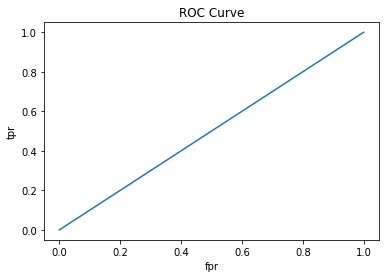

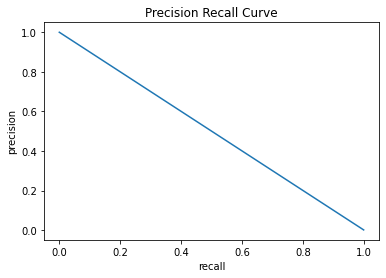

In [ ]:
print('LOGIT WITH LASSO')
giveOutp(clf.predict(scale(testX)))

BASE LOGIT
   Confusion Matrix:
[[142125     33]
 [    80    166]]


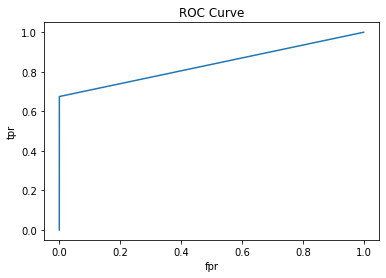

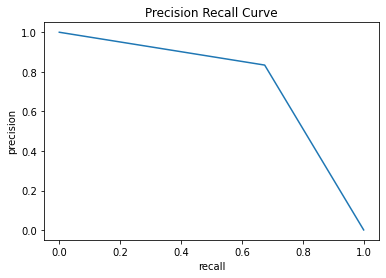

In [ ]:
print('BASE LOGIT')
giveOutp(clf2.predict(scale(testX)))

### SVM

SVM Poly Kernel
   Confusion Matrix:
[[142139     19]
 [    50    196]]


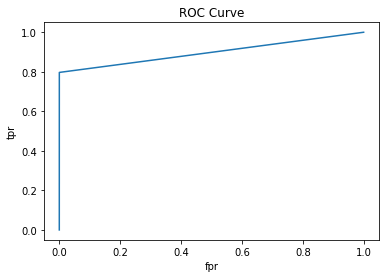

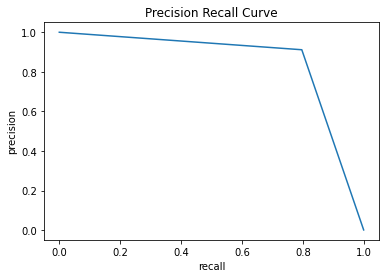

In [ ]:
print('SVM RBF Kernel')
giveOutp(clf3.predict(scale(testX)))

### shallow NN

SHALLOW NN
   Confusion Matrix:
[[142158      0]
 [   246      0]]


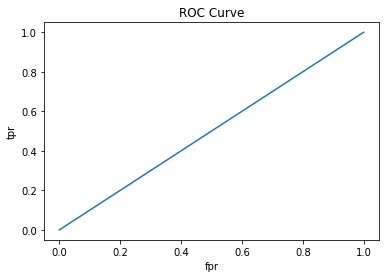

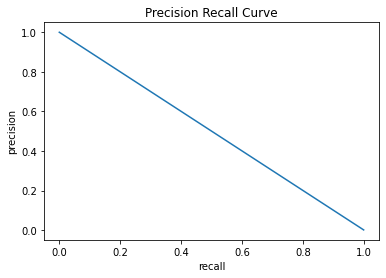

In [ ]:
print('SHALLOW NN')
giveOutp(modelS.predict(testX_nn)>0.5)

### deep NN

DEEP NN
   Confusion Matrix:
[[142129     29]
 [    72    174]]


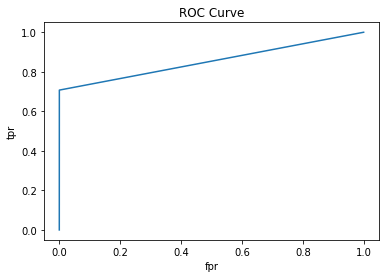

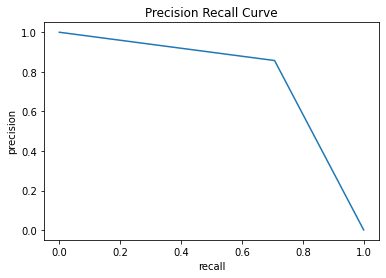

In [ ]:
print('DEEP NN')
giveOutp(model.predict(testX_nn)>0.5)

### random forests and boosted decision trees

RF
   Confusion Matrix:
[[142158      0]
 [   246      0]]


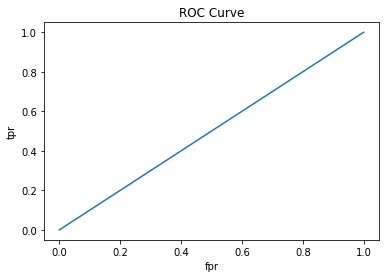

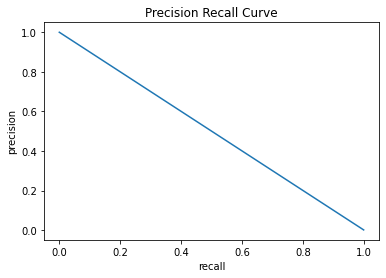

In [ ]:
print('RF')
giveOutp(rfBest.predict(testX_bb))

GBM
   Confusion Matrix:
[[142158      0]
 [   246      0]]


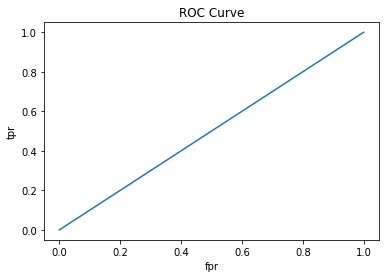

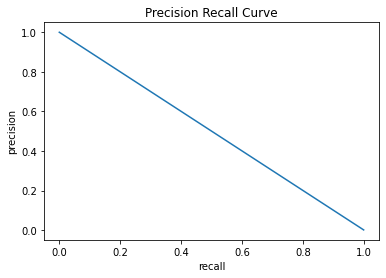

In [ ]:
print('GBM')
giveOutp(GBMBest.predict(testX_bb))

## d

### i

We see that the SVM with relu and optimal hyperparameter performs the best, both in terms of minimizing false positives and false negatives, as the data appears well-separable.

### ii

There are several differences between the models. Logit, SVM, and deep NN do a good job of finding significance in the predictive dataset and achieve a good precision-recall curve, which is important when the relative proportion of cases is small. On the other hand, more simplistic models such as shallow NN, LASSO logit, and Bagging / boosting perform worse and have linear curves due to misclassifying test data as 0, perhaps due to the small quantity of fraud cases and high dimensionality of data.

### iii

The predictions for SVM are fairly precise, as one would expect from the PCA plot and hyperparameter / kernel selection. Judging from the precision recall plots, as mentioned in (ii), SVM, deep NN, and logit do well.